#### - Sobhan Moradian Daghigh
#### 
#### - 1/17/2022
#### 
#### - PR - EX03 - Q4 - All Parts

In [133]:
import pandas as pd
from PIL import Image
import numpy as np
import cv2
from skimage.util import view_as_blocks
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

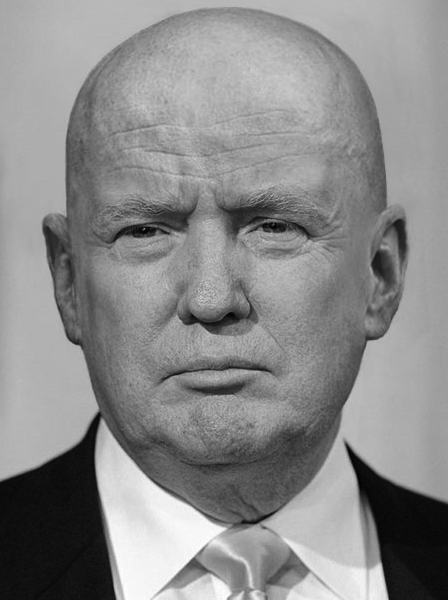

In [134]:
donald = Image.open('./inputs/P4/donald.png')
donald

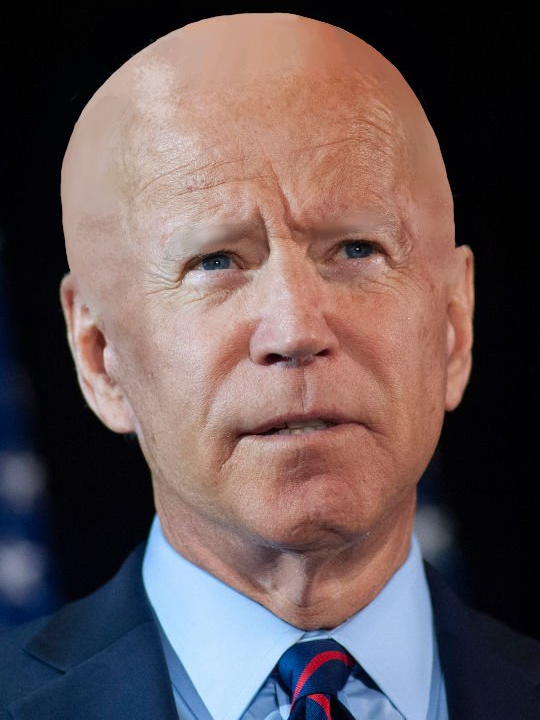

In [135]:
joe = Image.open('./inputs/P4/joe.png')
joe

### Part A.

In [136]:
donald = cv2.imread('./inputs/P4/donald.png')
joe = cv2.imread('./inputs/P4/joe.png')

In [137]:
patch_size = 8

In [138]:
def channel_merger(img):
    channels = []
    b, g, r = np.divide(cv2.split(img), 255)
    
    # Checking if a img is gray or color
    if ~((r == b).all() == True and (r == g).all() == True):
        return np.array([b, g, r])
    
    return np.array([b])

In [139]:
def reshaper(img):
    h, w = np.divmod(img.shape[:-1], patch_size)[0] * 8
    img = cv2.resize(img, (w, h))
    return img

In [140]:
def patch_extract(img):
    if ~(np.divmod(img.shape[:-1], patch_size)[1].any() == 0):
        img = reshaper(img)
    
    channels = channel_merger(img)
    # Using skimage to patching the images
    datas = []
    for channel in channels:
        dataset = []
        blocks = view_as_blocks(channel, block_shape=(patch_size, patch_size))
        for i in range(blocks.shape[0]):
            for j in range(blocks.shape[1]):
                dataset.append(blocks[i][j].reshape(patch_size ** 2))

        datas.append(pd.DataFrame(dataset))

    return datas, img

In [141]:
dataset_donald, donald = patch_extract(donald)
dataset_donald = dataset_donald[0]
dataset_donald.shape

(4200, 64)

In [142]:
dataset_joe, joe = patch_extract(joe)
print("b: {}".format(dataset_joe[0].shape))
print("g: {}".format(dataset_joe[1].shape))
print("r: {}".format(dataset_joe[2].shape))

b: (6030, 64)
g: (6030, 64)
r: (6030, 64)


### Part B.

In [143]:
donaldcov = dataset_donald.cov()
donaldcov

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.043921,0.043638,0.042931,0.042156,0.041391,0.040613,0.039774,0.038767,0.043766,0.043580,...,0.038806,0.038137,0.040324,0.040448,0.040273,0.039934,0.039595,0.039136,0.038567,0.037877
1,0.043638,0.044060,0.043733,0.042986,0.042217,0.041446,0.040616,0.039612,0.043474,0.043872,...,0.039408,0.038793,0.039985,0.040289,0.040376,0.040243,0.040012,0.039635,0.039125,0.038497
2,0.042931,0.043733,0.044229,0.043910,0.043140,0.042350,0.041536,0.040503,0.042865,0.043597,...,0.040067,0.039494,0.039662,0.040097,0.040421,0.040525,0.040454,0.040197,0.039765,0.039181
3,0.042156,0.042986,0.043910,0.044352,0.043944,0.043136,0.042321,0.041293,0.042162,0.042965,...,0.040592,0.040082,0.039275,0.039787,0.040232,0.040488,0.040612,0.040576,0.040277,0.039733
4,0.041391,0.042217,0.043140,0.043944,0.044203,0.043722,0.042915,0.041882,0.041402,0.042232,...,0.040832,0.040413,0.038767,0.039337,0.039854,0.040219,0.040485,0.040633,0.040473,0.040008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.039934,0.040243,0.040525,0.040488,0.040219,0.039944,0.039550,0.038924,0.040602,0.040968,...,0.043111,0.042190,0.043487,0.044404,0.045282,0.045695,0.045280,0.044390,0.043506,0.042430
60,0.039595,0.040012,0.040454,0.040612,0.040485,0.040284,0.039941,0.039377,0.040222,0.040713,...,0.043733,0.042838,0.042708,0.043619,0.044503,0.045280,0.045566,0.045037,0.044169,0.043097
61,0.039136,0.039635,0.040197,0.040576,0.040633,0.040542,0.040278,0.039789,0.039717,0.040298,...,0.044263,0.043523,0.041847,0.042743,0.043611,0.044390,0.045037,0.045245,0.044793,0.043829
62,0.038567,0.039125,0.039765,0.040277,0.040473,0.040540,0.040430,0.040066,0.039099,0.039745,...,0.044483,0.044088,0.040977,0.041842,0.042716,0.043506,0.044169,0.044793,0.045109,0.044470


In [144]:
joecovs = []
for channel in dataset_joe:
    joecovs.append(channel.cov())

In [145]:
pca_donald = PCA(n_components=20)
reduced_donald = pca_donald.fit_transform(donaldcov)

In [146]:
print('eigenvalue:')
pd.DataFrame(pca_donald.components_)    

eigenvalue:


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-0.103618,-0.061789,-0.010739,0.043691,0.091039,0.132670,0.168121,0.193131,-0.126352,-0.083527,...,0.076243,0.115841,-0.219276,-0.197718,-0.157313,-0.106899,-0.054386,0.003060,0.051710,0.091968
1,0.164652,0.161035,0.144771,0.124429,0.104762,0.082382,0.062300,0.041275,0.143773,0.138195,...,-0.204727,-0.199396,-0.116346,-0.143738,-0.174594,-0.202109,-0.217476,-0.224449,-0.226300,-0.217575
2,-0.143653,-0.170939,-0.192441,-0.194316,-0.178944,-0.143978,-0.101588,-0.064764,-0.139087,-0.173731,...,-0.041233,-0.013174,0.006894,-0.006351,-0.032414,-0.051154,-0.056605,-0.044851,-0.021200,0.001840
3,0.185822,0.193134,0.150896,0.076266,-0.006271,-0.099475,-0.180123,-0.227598,0.156579,0.173761,...,0.189542,0.193394,-0.162994,-0.150043,-0.087663,0.000275,0.091887,0.169513,0.217676,0.232785
4,-0.055208,0.035993,0.144825,0.203817,0.218175,0.188743,0.126896,0.059947,-0.119861,-0.038166,...,-0.034548,-0.126466,0.034588,0.104562,0.190157,0.238938,0.217165,0.134911,0.036443,-0.057104
5,-0.056893,-0.017230,-0.045465,-0.129889,-0.141358,-0.023112,0.150947,0.293073,-0.025444,0.026795,...,-0.027841,-0.009826,-0.318130,-0.221022,-0.050090,0.081211,0.088387,0.024540,-0.007699,0.023115
6,0.282811,0.270586,0.122064,-0.075185,-0.182375,-0.165637,-0.096967,-0.017882,0.180206,0.161636,...,-0.119785,-0.153036,0.010890,0.080744,0.139556,0.128054,0.030523,-0.120745,-0.240686,-0.286965
7,-0.029827,-0.004063,0.030351,0.064136,0.077357,0.033652,-0.038821,-0.086002,-0.128153,-0.128711,...,-0.023408,-0.043897,-0.082752,-0.134434,-0.187744,-0.216019,-0.212620,-0.168690,-0.133494,-0.098962
8,-0.157031,-0.022223,0.059874,-0.003666,-0.132747,-0.204663,-0.174729,-0.077015,-0.181627,0.005638,...,-0.069233,0.179474,0.086110,0.111392,0.098243,0.014042,-0.107445,-0.125754,0.000222,0.219066
9,-0.083389,0.075124,0.244764,0.283750,0.208925,0.115911,0.074946,0.000386,-0.125393,-0.004757,...,0.026998,0.122934,-0.105535,-0.012941,0.052769,0.003125,-0.095005,-0.125761,-0.088053,-0.034027


In [147]:
print('eigenvector:')
pd.DataFrame(pca_donald.explained_variance_).T   

eigenvector:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000067,0.000043,0.000017,0.000001,8.742065e-07,2.907930e-07,2.115677e-07,1.609036e-07,1.185093e-07,8.338434e-08,3.553409e-08,3.330749e-08,2.559636e-08,1.976537e-08,1.209845e-08,1.106837e-08,1.009611e-08,7.116254e-09,6.654442e-09,5.539522e-09


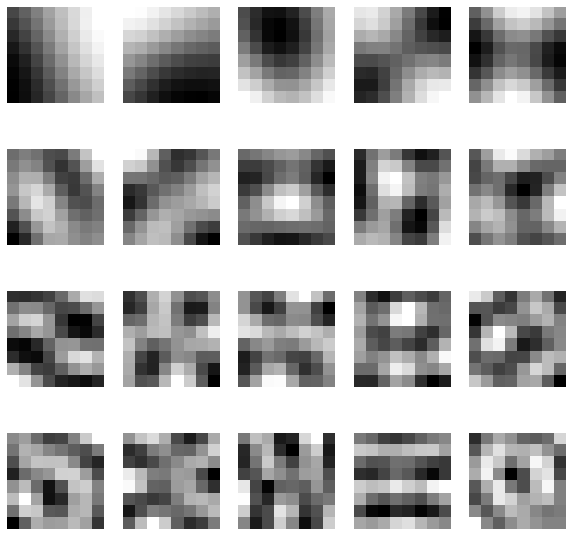

In [148]:
fig, ax = plt.subplots(4, 5, figsize=(10, 10))
[axi.set_axis_off() for axi in ax.ravel()]

for i, ax in enumerate(fig.axes):
    ax.imshow(pca_donald.components_[i].reshape(8, 8), cmap='gray')

In [41]:
for cov in joecovs:
    pca_joe = PCA(n_components=20)
    reduced_joe = pca_joe.fit_transform(cov)
    for val, vec in zip(pca_joe.explained_variance_, pca_joe.components_):
        print('eigenvalue: {}'.format(val))
        print('eigenvector: {} more...'.format(vec[:5]))
        print()
    print("\n-----------------------------------------------------------------------------------------\n\n")

eigenvalue: 7.73456320030931e-05
eigenvector: [-0.1388645  -0.10578707 -0.06324867 -0.00807555  0.05534977] more...

eigenvalue: 2.8647981226761988e-05
eigenvector: [-0.19163598 -0.20699348 -0.21728257 -0.22011582 -0.2143652 ] more...

eigenvalue: 1.8527393156503285e-05
eigenvector: [ 0.00301781 -0.01519232 -0.03460442 -0.04323755 -0.03650722] more...

eigenvalue: 1.6299155288566458e-06
eigenvector: [ 0.19651566  0.20050404  0.17058126  0.09624325 -0.00254937] more...

eigenvalue: 6.421623490557951e-07
eigenvector: [-0.08774124  0.01365479  0.12230311  0.19904129  0.22292243] more...

eigenvalue: 2.005408113131235e-07
eigenvector: [ 0.24285299  0.15220251 -0.01493893 -0.15185269 -0.19899682] more...

eigenvalue: 1.5342898582865465e-07
eigenvector: [0.21363896 0.16364137 0.10786351 0.05559166 0.00768909] more...

eigenvalue: 7.859293582981513e-08
eigenvector: [ 0.11259848 -0.06307536 -0.14721201 -0.07890346  0.07956175] more...

eigenvalue: 6.660277376627507e-08
eigenvector: [-0.0371858

In [118]:
dataset_joe[0]

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.003922,0.003922,0.011765,0.011765,...,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843
1,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
2,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
3,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843
4,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.011765,0.007843,0.003922,0.003922,0.003922,0.007843,0.007843,0.007843,0.011765,0.007843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025,0.152941,0.152941,0.156863,0.156863,0.149020,0.145098,0.145098,0.141176,0.152941,0.152941,...,0.160784,0.164706,0.156863,0.160784,0.160784,0.160784,0.149020,0.149020,0.160784,0.164706
6026,0.141176,0.137255,0.137255,0.137255,0.145098,0.149020,0.141176,0.145098,0.141176,0.141176,...,0.152941,0.149020,0.160784,0.160784,0.160784,0.164706,0.160784,0.145098,0.152941,0.149020
6027,0.149020,0.149020,0.152941,0.152941,0.137255,0.137255,0.133333,0.133333,0.145098,0.145098,...,0.133333,0.152941,0.141176,0.152941,0.137255,0.141176,0.168627,0.149020,0.133333,0.152941
6028,0.133333,0.133333,0.129412,0.125490,0.133333,0.133333,0.133333,0.133333,0.137255,0.133333,...,0.129412,0.125490,0.164706,0.145098,0.129412,0.133333,0.145098,0.137255,0.129412,0.125490


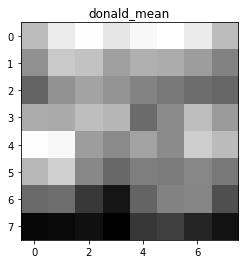

In [126]:
for i, data in enumerate([dataset_donald]): # dataset_joe
    if i == 1:
        b = data[0].mean().values.reshape(8, 8)
        g = data[1].mean().values.reshape(8, 8)
        r = data[2].mean().values.reshape(8, 8)
        img = np.dstack((r, g, b))
        plt.imshow(img, cmap='gray')        
        
    else:
        img = np.array(data.mean().values.reshape(8, 8))
        plt.imshow(img, cmap='gray')
    
    plt.title(['donald_mean', 'joe_mean'][i])
    plt.show()

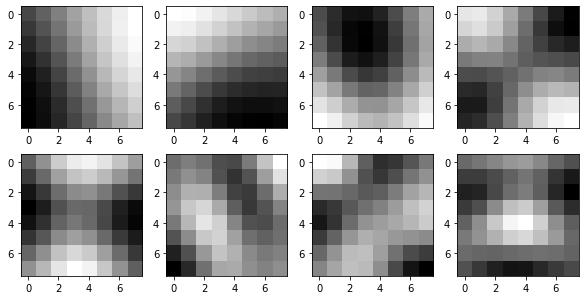

In [43]:
fig, ax = plt.subplots(2, 4, figsize=(10, 5))
for i, ax in enumerate(fig.axes):
    img = np.array(pca_donald.components_[i]).reshape(8, 8)
    ax.imshow(img, cmap='gray')
    
plt.show()

### Part C.

In [108]:
def patch_reconstruct(reduced, img):
    reduced = reduced.reshape((img.shape[0] // patch_size, img.shape[1] // patch_size, patch_size, patch_size))
    reduced = reduced.transpose(0,2,1,3).reshape(img.shape[0], img.shape[1])
    return reduced

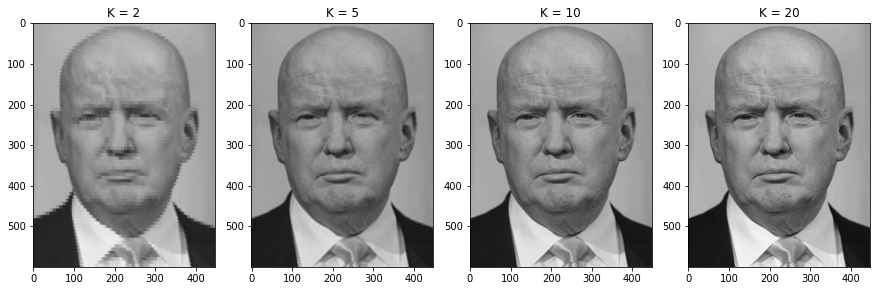

In [109]:
# Donald

k = [2, 5, 10, 20]
fig, ax = plt.subplots(1, 4, figsize=(15, 10))
for i, ax in enumerate(fig.axes):
    
    # Compress
    pca_donald = PCA(n_components=k[i])
    reduced_donald = pca_donald.fit_transform(dataset_donald)
    
    # Reconstruct
    reduced_donald = pca_donald.inverse_transform(reduced_donald)
    reconstructed_donald = patch_reconstruct(reduced_donald, donald)
    
    ax.imshow(reconstructed_donald, cmap='gray')
    ax.set_title('K = {}'.format(k[i]))
    
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


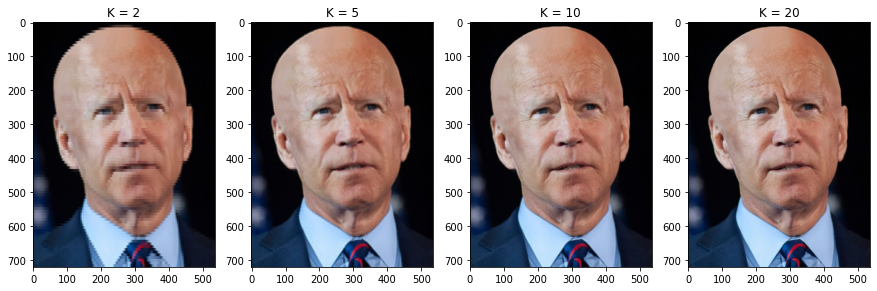

In [111]:
# Joe

k = [2, 5, 10, 20]
fig, ax = plt.subplots(1, 4, figsize=(15, 10))
for i, ax in enumerate(fig.axes):
    
    channels = []
    for channel in dataset_joe:
        
        # Compress
        pca_joe = PCA(n_components=k[i])
        reduced_joe = pca_joe.fit_transform(channel)

        # Reconstruct
        reduced_joe = pca_joe.inverse_transform(reduced_joe)
        reconstructed_joe = patch_reconstruct(reduced_joe, joe)
        
        channels.append(reconstructed_joe)
    
    rgb_joe = np.dstack((channels[2], channels[1], channels[0]))
    
    ax.imshow(rgb_joe)
    ax.set_title('K = {}'.format(k[i]))
    
plt.show()

### FINITO